## 1. Cities in Sweden - create dataset (*)

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly_express as px

sns.set()

In [55]:
# Method 1
series1 = pd.Series(["Malmö",
                     "Stockholm",
                     "Uppsala",
                     "Göteborg"])

series2 = pd.Series([347949,
                     975551,
                     233839,
                     583056])

df = pd.DataFrame({"Kommun": series1, "Population": series2})
df


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [56]:
# Method 2
# adds row labels.
series1 = pd.Series({"0": "Malmö",
                     "1": "Stockholm",
                     "2": "Uppsala",
                    "3": "Göteborg"})

series2 = pd.Series({"0": 347949,
                    "1": 975551,
                     "2": 233839,
                     "3": 583056})

df = pd.DataFrame({"Kommun": series1, "Population": series2})
df


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [57]:
# Method 3
singledict = {
    "Kommun": {
        "0": "Malmö",
        "1": "Stockholm",
        "2": "Uppsala",
        "3": "Göteborg"
    },
    "Population": {
        "0": 347949,
        "1": 975551,
        "2": 233839,
        "3": 583056
    }}

singledict = {
    "Kommun":
        [
        "Malmö",
        "Stockholm",
        "Uppsala",
        "Göteborg"
        ],
        
    "Population":
        [
        347949,
        975551,
        233839,
        583056
        ]
    }

df = pd.DataFrame(singledict)
df

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [58]:
# a)
df


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [59]:
# b)
df.loc[df['Kommun'] == 'Göteborg']
df

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [60]:
# c)
df = df.sort_values(by=['Population'], ascending=False)
df


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [61]:
# d)
df.iloc[:3]


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [62]:
# e)
df['Population (%)'] = (df['Population'] / 10379295 * 100).round(1)
df


,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


## 2. Cities in Sweden - real dataset (*)

In [63]:
# a)
df = pd.read_excel('komtopp50_2020.xlsx', sheet_name="Totalt")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    object 
 1   Unnamed: 1  291 non-null    float64
 2   Unnamed: 2  291 non-null    object 
 3   Unnamed: 3  292 non-null    object 
 4   Unnamed: 4  291 non-null    float64
 5   Unnamed: 5  292 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


,Unnamed: 1,Unnamed: 4
count,291.000000,291.000000
mean,151.934708,35496.934708
std,138.092769,74190.464321
min,1.000000,2019.000000
25%,73.500000,10005.000000
50%,146.000000,15940.000000
75%,218.500000,35649.500000
max,2019.000000,974073.000000


In [64]:
# b)
df = pd.read_excel('komtopp50_2020.xlsx', header=6, sheet_name="Totalt")
df.columns = ["Rang 2020", "Rang 2019", "Kommun",
              "Folkmängd 2020", "Folkmängd 2019", "1Förändring"]
df.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,1Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [65]:
# c)
df = df.sort_values(by="Folkmängd 2020", ascending=False)
df


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,1Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309


In [66]:
# d)
df = df[:-5]
df


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,1Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
157,281,281,Norsjö,3945,3986,-1.028600
265,282,282,Ydre,3726,3747,-0.560448
146,283,283,Munkfors,3725,3740,-0.401070
288,284,284,Överkalix,3289,3315,-0.784314


In [67]:
# e)
swedish_pop_2019 = df['Folkmängd 2019'].sum()
swedish_pop_2020 = df['Folkmängd 2020'].sum()
print(f"Population in Sweden 2019: {swedish_pop_2019}")
print(f"Population in Sweden 2020: {swedish_pop_2020}")


Population in Sweden 2019: 10314562
Population in Sweden 2020: 10366445


In [68]:
# f)
swedish_pop_largest_cities = df[:5]
swedish_pop_smallest_cities = df[-5:]
swedish_pop_largest_cities
swedish_pop_smallest_cities

swedish_pop_largest_cities = px.bar(
    data_frame=swedish_pop_largest_cities,
    width=650,
    x="Kommun",
    y="Folkmängd 2020",
    title="Population of swedens largest cities"
)

swedish_pop_smallest_cities = px.bar(
    data_frame=swedish_pop_smallest_cities,
    width=650,
    x="Kommun",
    y="Folkmängd 2020",
    title="Population of swedens largest cities"
)

swedish_pop_largest_cities.show()
swedish_pop_smallest_cities.show()


# 3. Cities in Sweden - gender (*)

In [69]:
# a)

df1 = pd.read_excel('komtopp50_2020.xlsx', sheet_name="Män")
df2 = pd.read_excel('komtopp50_2020.xlsx', sheet_name="Kvinnor")

def clean_data(dataframe: pd.DataFrame) -> pd.DataFrame:

    dataframe.columns = ["Rang 2020", "Rang 2019", "Kommun",
                         "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
    
    if "Antal män" in dataframe.iloc[[1]].to_string():
        dataframe['Kön'] = 'Man'
    else:
        dataframe['Kön'] = 'Kvinna'
        
    dataframe = dataframe.iloc[6:]

    return dataframe

men = clean_data(df1)
women = clean_data(df2)
women.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,84,85.0,Ale,15612,15348.0,1.720094,Kvinna
7,64,64.0,Alingsås,20900,20774.0,0.606527,Kvinna
8,123,123.0,Alvesta,9857,9795.0,0.632976,Kvinna
9,255,255.0,Aneby,3318,3350.0,-0.955224,Kvinna
10,165,164.0,Arboga,6945,6973.0,-0.401549,Kvinna


In [70]:
# b)
df = pd.concat([men, women])
df = df.iloc[:, 2:]
df.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,Ale,16256,16054.0,1.258253,Man
7,Alingsås,20702,20646.0,0.271239,Man
8,Alvesta,10367,10339.0,0.270819,Man
9,Aneby,3503,3498.0,0.142939,Man
10,Arboga,7094,7114.0,-0.281136,Man


In [71]:
# c)
totalsheet_df = pd.read_excel(
    'komtopp50_2020.xlsx', header=6, sheet_name="Totalt")
totalsheet_df = totalsheet_df.iloc[:, 2:]

totalsheet_df.columns = ["Kommun", "Total Pop 2020",
                         "Total Pop 2019", "Total förändring"]
totalsheet_df.head()


,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.340740


In [72]:
# d)
df = pd.merge(df, totalsheet_df, on='Kommun')
df

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,16256,16054.0,1.258253,Man,31868,31402,1.483982
1,Ale,15612,15348.0,1.720094,Kvinna,31868,31402,1.483982
2,Alingsås,20702,20646.0,0.271239,Man,41602,41420,0.439401
3,Alingsås,20900,20774.0,0.606527,Kvinna,41602,41420,0.439401
4,Alvesta,10367,10339.0,0.270819,Man,20224,20134,0.447005
...,...,...,...,...,...,...,...,...
575,Östra Göinge,7270,7262.0,0.110162,Kvinna,15017,15007,0.066636
576,Överkalix,1730,1737.0,-0.402994,Man,3289,3315,-0.784314
577,Överkalix,1559,1578.0,-1.204056,Kvinna,3289,3315,-0.784314
578,Övertorneå,2190,2234.0,-1.969561,Man,4217,4299,-1.907420


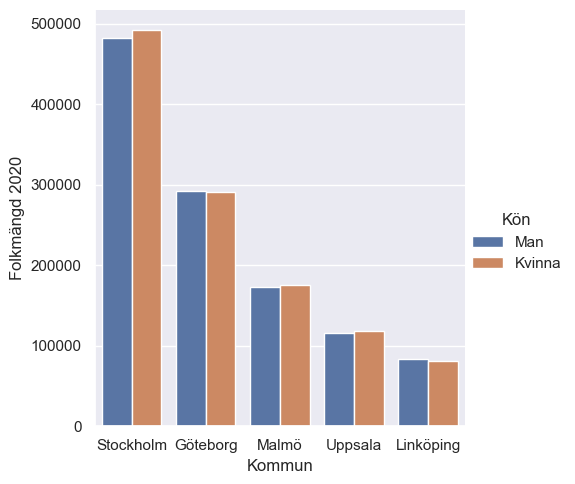

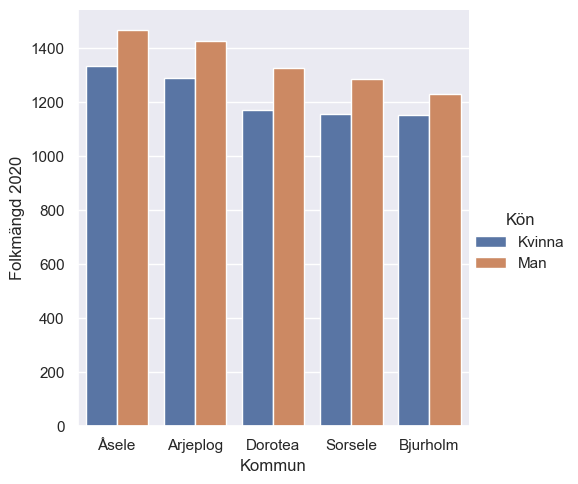

In [73]:
# e)
df = df.sort_values(by='Total Pop 2020', ascending=False)

largest_cities = df[:10]
smallest_cities = df[-10:]

# Draw a nested barplot by species and sex
sns.catplot( # Meow
    data=largest_cities,
    kind="bar",
    x="Kommun",
    y='Folkmängd 2020',
    hue="Kön",
    height=5
)

sns.catplot(  # Meow
    data=smallest_cities,
    kind="bar",
    x="Kommun",
    y='Folkmängd 2020',
    hue="Kön",
    height=5
)


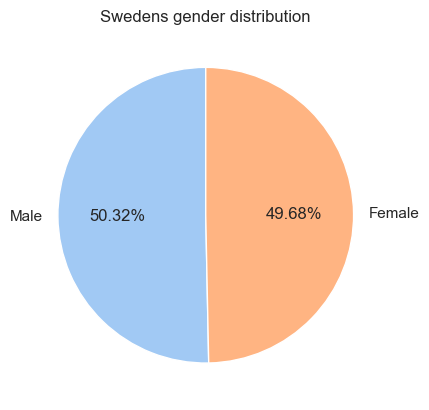

In [74]:
# f)

Men = df.loc[df['Kön'] == 'Man', 'Folkmängd 2020'].sum()
Women = df.loc[df['Kön'] == 'Kvinna', 'Folkmängd 2020'].sum()

labels = ['Male', 'Female']

colors = sns.color_palette('pastel')[0:7]

plt.pie([Men, Women], labels=labels, colors=colors, autopct='%0.2f%%', startangle=90)
plt.title("Swedens gender distribution")
plt.show()
